In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import glob as gb
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg
from tqdm import tqdm
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.optimizers import Adam

from keras.applications import DenseNet121
from keras.applications import ResNet50V2
from keras.applications import ResNet152V2
from keras.applications import InceptionV3
from keras.applications import Xception

In [6]:
train_path = '/kaggle/input/raf-db-happy-sad-angry-neutral/train'
test_path = '/kaggle/input/raf-db-happy-sad-angry-neutral/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    brightness_range=[0.9,1.1],
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Tambahkan ini
)

test_datagen = ImageDataGenerator(
        rescale=1./255,
)

images_size = 100
batch_size = 64

train_generator = train_datagen.flow_from_directory(
    train_path,                  
    target_size=(images_size, images_size), 
    batch_size=batch_size,
    shuffle=True,
    seed=32,
    subset='training',  # Subset untuk pelatihan
    class_mode='categorical',
    color_mode='grayscale'
)

val_generator = train_datagen.flow_from_directory(
    train_path,                  
    target_size=(images_size, images_size), 
    batch_size=batch_size,
    shuffle=True,
    seed=32,
    subset='validation',  # Subset untuk validasi
    class_mode='categorical',
    color_mode='grayscale'
)


test_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.5
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(images_size, images_size),
    batch_size = batch_size,
    shuffle=False,
    class_mode='categorical',
    color_mode='grayscale'
    
)

Found 7984 images belonging to 4 classes.
Found 1994 images belonging to 4 classes.
Found 2505 images belonging to 4 classes.


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

def CustomSequentialModel(input_shape=(images_size, images_size, 1), num_classes=4):
    model = Sequential()
    
    # Blok 1
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Blok 2
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    # Blok 3
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
    
    # Blok 4
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
    
    # Fully Connected
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

# Buat model Sequential
model = CustomSequentialModel()

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])



In [9]:
history = model.fit(
    train_generator,  # Generator untuk data pelatihan
    validation_data=test_generator,  # Generator untuk data validasi
    epochs=75,  # Jumlah epoch
)


Epoch 1/75


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 188s 1s/step - accuracy: 0.3774 - loss: 2.5205 - val_accuracy: 0.1908 - val_loss: 2.1343
Epoch 2/75
125/125 ━━━━━━━━━━━━━━━━━━━━ 188s 1s/step - accuracy: 0.4566 - loss: 1.2759 - val_accuracy: 0.1908 - val_loss: 1.9178
Epoch 3/75
125/125 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.4947 - loss: 1.1712 - val_accuracy: 0.2379 - val_loss: 1.7748
Epoch 4/75
125/125 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - accuracy: 0.5088 - loss: 1.1127 - val_accuracy: 0.4084 - val_loss: 1.4824
Epoch 5/75
125/125 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - accuracy: 0.5493 - loss: 1.0525 - val_accuracy: 0.5453 - val_loss: 1.2009
Epoch 6/75
125/125 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - accuracy: 0.5502 - loss: 1.0258 - val_accuracy: 0.5892 - val_loss: 1.1169
Epoch 7/75
125/125 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.5862 - loss: 0.9693 - val_accuracy: 0.6020 - val_loss: 1.0776
Epoch 8/75
125/125 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.5821 - loss: 0.9726 - val_accuracy: 0.633

In [10]:
print("Train images:", len(train_generator.filenames))
print("Validation images:", len(val_generator.filenames))
print(train_generator.class_indices)  # Untuk memeriksa apakah kelas terbaca dengan benar
print(val_generator.class_indices)
print(test_generator.class_indices)


Train images: 7984
Validation images: 1994
{'angry': 0, 'happy': 1, 'neutral': 2, 'sad': 3}
{'angry': 0, 'happy': 1, 'neutral': 2, 'sad': 3}
{'angry': 0, 'happy': 1, 'neutral': 2, 'sad': 3}


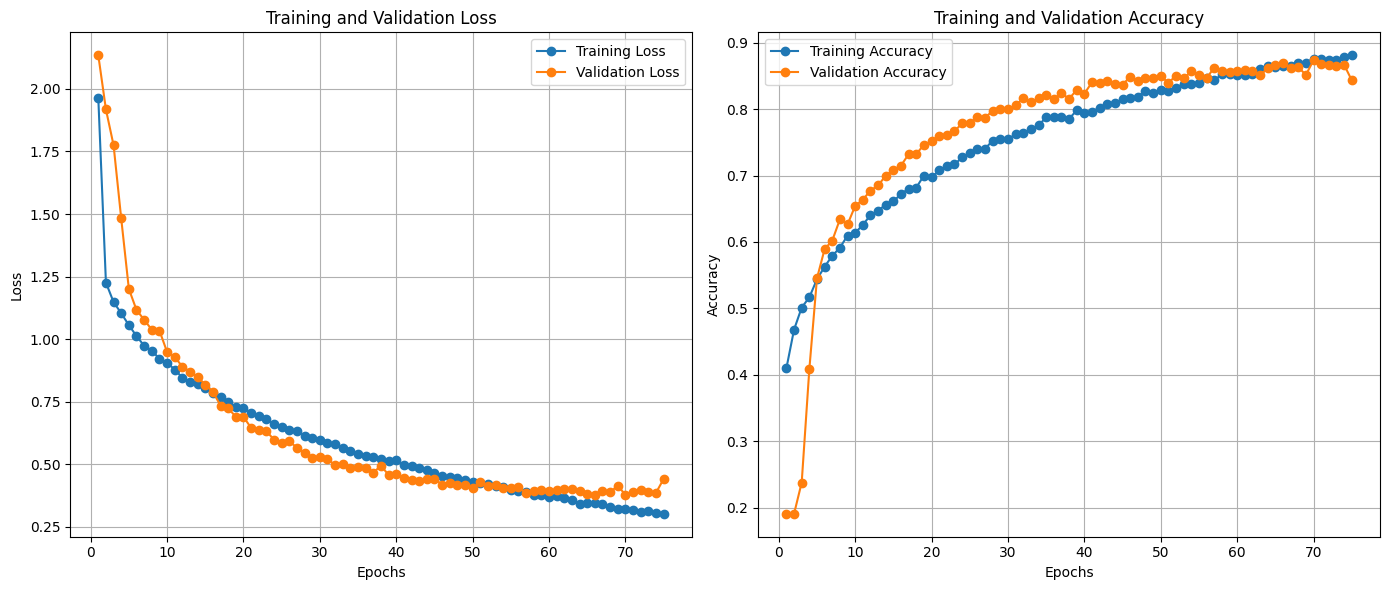

In [13]:
import matplotlib.pyplot as plt

# Ambil data dari history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot loss
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, label='Training Accuracy', marker='o')
plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Tampilkan grafik
plt.tight_layout()
plt.show()


In [16]:
from keras.models import load_model
import numpy as np

# Muat model yang telah disimpan (ganti 'custom_model.h5' dengan nama file Anda)
model = load_model('ekspresi.keras')

# Evaluasi model pada data uji
# Pastikan `test_generator` telah didefinisikan sebelumnya, seperti saat pelatihan
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Prediksi dengan data uji
# Gunakan metode predict jika ingin melihat prediksi per data
predictions = model.predict(test_generator)

# Konversi probabilitas menjadi label prediksi
predicted_classes = np.argmax(predictions, axis=1)

# Ambil label sebenarnya dari data uji
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Hitung laporan klasifikasi
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Matriks kebingungan
print("Confusion Matrix:")
print(confusion_matrix(true_classes, predicted_classes))


40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 236ms/step - accuracy: 0.8620 - loss: 0.4317
Test Loss: 0.4412904679775238
Test Accuracy: 0.8435129523277283
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 239ms/step
Classification Report:
              precision    recall  f1-score   support

       angry       0.77      0.80      0.78       162
       happy       0.94      0.91      0.92      1185
     neutral       0.84      0.74      0.79       680
         sad       0.68      0.85      0.76       478

    accuracy                           0.84      2505
   macro avg       0.81      0.82      0.81      2505
weighted avg       0.85      0.84      0.85      2505

Confusion Matrix:
[[ 129   11   11   11]
 [  16 1073   42   54]
 [  13   38  506  123]
 [   9   22   42  405]]


In [17]:
from keras.models import load_model

# Muat model
model.save('ekspresi.h5')
print("model.save ekspresi.h5")

model.save ekspresi.h5


In [18]:
import os
print(os.listdir('/kaggle/working'))

['ekspresi.keras', 'ekspresi.h5', '.virtual_documents']


In [ ]:
!pip install PyDrive

In [ ]:
# base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(images_size, images_size, 3))
# # Freeze the layers of the base model
# for layer in base_model.layers:
#     layer.trainable = False

In [ ]:
# model = tf.keras.models.Sequential([
#     base_model,
    
#     layers.Flatten(),
    
#     layers.Dense(256,activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(7,activation='softmax'),
#     # layers.Dense(2,activation='softmax'),
# ])

# optimizer = optimizers.Adam(learning_rate=learning_rate_schedule)
# model.compile(optimizer=optimizer,
#              loss="categorical_crossentropy",
#               metrics=['accuracy']
#              )

# model.summary()

# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // batch_size,
#     epochs=50,
#     validation_data=test_generator,
#     validation_steps=test_generator.samples // batch_size,
#     callbacks=[callback]
# )

In [ ]:
# # Evaluate on test dataset
# score = model.evaluate(test_generator, verbose=False)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

# # Accuracy
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# epochs = range(len(acc))

# plt.plot(epochs, acc, 'b', label='Training Accuracy')
# plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
# plt.title('Accuracy Graph')
# plt.legend()
# plt.figure()

# # Loss
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# plt.plot(epochs, loss, 'b', label='Training Loss')
# plt.plot(epochs, val_loss, 'r', label='Validation Loss')
# plt.title('Loss Graph')
# plt.legend()
# plt.show()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# label_mapping = {0: "surprise", 1: "disgust", 2: "fear", 3: "happy", 4: "sad", 5: "angry", 6: "neutral"}

# y_true = test_generator.classes
# y_pred_probs = model.predict(test_generator, steps=test_generator.samples // batch_size + 1)
# y_pred = np.argmax(y_pred_probs, axis=1)

# cm = confusion_matrix(y_true, y_pred)
# labels = [label_mapping[i] for i in range(len(label_mapping))]

# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
# disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
# plt.title('Confusion Matrix')
# plt.show()


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Definisikan mapping label numerik ke nama kelas
# label_mapping = {0: "surprise", 1: "disgust", 2: "fear", 3: "happy", 4: "sad", 5: "angry", 6: "neutral"}
# num_classes = len(label_mapping)

# # Variabel untuk menyimpan label sebenarnya dan prediksi
# true_labels = []
# predicted_labels = []
# x_data = []  # Untuk menyimpan semua gambar

# # Melakukan iterasi batch pada test_generator
# num_batches = len(test_generator)
# for i in range(num_batches):
#     x_batch, y_batch = test_generator[i]  # Mendapatkan batch data dan label
#     predictions = model.predict(x_batch)  # Prediksi dengan model

#     # Konversi dari one-hot encoding ke indeks kelas
#     true_labels.extend(np.argmax(y_batch, axis=1))
#     predicted_labels.extend(np.argmax(predictions, axis=1))
#     x_data.extend(x_batch)  # Menyimpan gambar

# # Ubah label numerik menjadi nama kelas
# true_class_labels = [label_mapping[i] for i in true_labels]
# predicted_class_labels = [label_mapping[i] for i in predicted_labels]

# # Pilih beberapa gambar untuk setiap label (misalnya, 3 gambar per kelas)
# samples_per_class = 3  # Atur jumlah gambar yang ingin diambil untuk setiap kelas
# selected_indices = []
# for label in range(num_classes):
#     indices = [i for i, t in enumerate(true_labels) if t == label]  # Cari semua indeks untuk label tertentu
#     selected_indices.extend(indices[:samples_per_class])  # Ambil hingga `samples_per_class` gambar per label

# # Plot gambar yang dipilih
# num_images = len(selected_indices)
# plt.figure(figsize=(15, (num_images // 5 + 1) * 3))  # Tinggi disesuaikan dengan jumlah baris
# for i, idx in enumerate(selected_indices):
#     img = x_data[idx]
#     if img.max() <= 1:  # Jika gambar dalam rentang [0, 1]
#         img = (img * 255).astype("uint8")  # Ubah ke rentang [0, 255]

#     plt.subplot((num_images // 5 + 1), 5, i + 1)
#     plt.imshow(img)
#     plt.title(f"True: {true_class_labels[idx]}\nPred: {predicted_class_labels[idx]}", fontsize=8)
#     plt.axis("off")

# plt.tight_layout()
# plt.show()

In [ ]:
base_model = CustomCNN()
# Freeze the layers of the base modelCustom
# for layer in base_model.layers:
#     layer.trainable = False

modelCustom = tf.keras.models.Sequential([
    base_model,
    
    layers.Flatten(),
    
    layers.Dense(256,activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
        
    layers.Dense(512,activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    
    layers.Dense(4, activation='softmax')
])

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

def learning_rate_schedule(epoch):
    initial_lr = 0.001
    drop_factor = 0.5
    epoch_drop = 10
    return initial_lr * (drop_factor ** (epoch // epoch_drop))

lr_callback = LearningRateScheduler(learning_rate_schedule)

optimizer = Adam()

modelCustom.compile(optimizer=optimizer,
              loss="categorical_crossentropy",
              metrics=['accuracy'])

history = modelCustom.fit(train_generator,steps_per_epoch=train_generator.samples // batch_size,epochs=200,validation_data=test_generator,validation_steps=test_generator.samples // batch_size, callbacks=[lr_callback]  # Use the lr_callback here
)


In [ ]:
# Evaluate on test dataset
score = modelCustom.evaluate(test_generator, verbose=False)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

# Loss
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

label_mapping = {0: "angry", 1: "happy", 2: "neutral", 3: "sad"}

y_true = test_generator.classes
y_pred_probs = modelCustom.predict(test_generator, steps=test_generator.samples // batch_size + 1)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_true, y_pred)
labels = [label_mapping[i] for i in range(len(label_mapping))]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# Plot gambar yang dipilih
num_images = len(selected_indices)
columns = 5  # Atur jumlah kolom tetap
rows = (num_images + columns - 1) // columns  # Hitung jumlah baris

plt.figure(figsize=(columns * 3, rows * 3))  # Atur ukuran figure berdasarkan kolom dan baris
for i, idx in enumerate(selected_indices):
    img = x_data[idx]
    if img.max() <= 1:  # Jika gambar dalam rentang [0, 1]
        img = (img * 255).astype("uint8")  # Ubah ke rentang [0, 255]

    plt.subplot(rows, columns, i + 1)  # Gunakan jumlah baris dan kolom yang dihitung
    plt.imshow(img)
    plt.title(f"True: {true_class_labels[idx]}\nPred: {predicted_class_labels[idx]}", fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
# # Clear output folder
# import os

# def remove_folder_contents(folder):
#     for the_file in os.listdir(folder):
#         file_path = os.path.join(folder, the_file)
#         try:
#             if os.path.isfile(file_path):
#                 os.unlink(file_path)
#             elif os.path.isdir(file_path):
#                 remove_folder_contents(file_path)
#                 os.rmdir(file_path)
#         except Exception as e:
#             print(e)

# folder_path = '/kaggle/working'
# remove_folder_contents(folder_path)
# os.rmdir(folder_path)


In [ ]:
# Simpan model ke file HDF5
modelCustom.save("modelCustom4class.h5")

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
# Path ke gambar single image
image_path = '/kaggle/input/fer2013/test/neutral/PrivateTest_1129340.jpg'

# Memuat gambar dengan ukuran sesuai yang digunakan saat pelatihan
image = load_img(image_path, target_size=(images_size, images_size))

# Mengubah gambar ke array NumPy
image_array = img_to_array(image) / 255.0  # Rescale seperti pada train_datagen

# Tambahkan dimensi batch (dari (100, 100, 3) menjadi (1, 100, 100, 3))
image_array = np.expand_dims(image_array, axis=0)

# Prediksi
predictions = modelCustom.predict(image_array)
print(predictions)

predicted_class = np.argmax(predictions, axis=1)
print(f"Predicted class: {predicted_class}")

# Menampilkan label kelas (mapping class index ke nama kelas)
class_indices = train_generator.class_indices
labels = dict((v, k) for k, v in class_indices.items())  # Balik mapping dari index ke label
predicted_label = labels[predicted_class[0]]
print(f"Predicted label: {predicted_label}")

# Tampilkan gambar beserta label prediksi
plt.figure(figsize=(6, 6))
plt.imshow(image)  # Menampilkan gambar asli
plt.title(f"Predicted: {predicted_label}", fontsize=14)
plt.axis('off')  # Menghilangkan axis pada gambar
plt.show()